# 0. Setup

In [1]:
import sys

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sys.path.append("..")

import arcadia_pycolor as apc

apc.mpl.setup()

# 1. Heatmaps with Seaborn

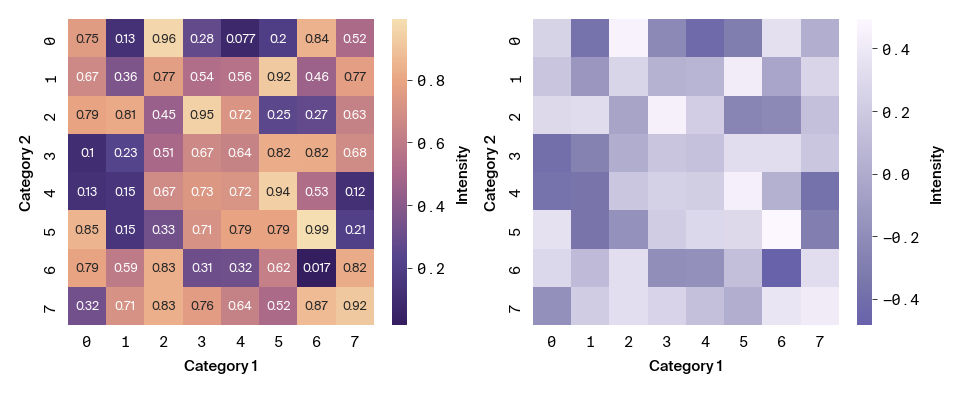

In [2]:
random_data = np.random.rand(8, 8)

fig, axs = plt.subplots(1, 2, figsize=(13, 5), layout="constrained")
sns.heatmap(
    random_data,
    ax=axs[0],
    square=True,
    cmap="apc:magma",
    cbar_kws={"label": "Intensity"},
    annot=True,
    annot_kws={"fontsize": 12},
)
sns.heatmap(
    random_data - 0.5,
    ax=axs[1],
    square=True,
    cmap="apc:purples",
    cbar_kws={"label": "Intensity"},
)

for ax in axs:
    apc.mpl.style_plot(
        ax,
        categorical_axes="both",
        monospaced_axes="both",
        colorbar_exists=True,
    )
    ax.set_xlabel("Category 1")
    ax.set_ylabel("Category 2")

plt.show()